In [5]:
!pip3 install pyspark 
!pip3 install py4j

In [2]:
#import necessary packages
from pyspark.sql import SQLContext
from pyspark.sql import functions as func
from pyspark import SparkContext
from pyspark.sql.types import StringType, IntegerType

#create spark context
SparkContext.getOrCreate()
sc = SparkContext.getOrCreate("bank_analyze")

#create sql context
sqlCtx = SQLContext(sc)

d:\users\rezaz\pycharmprojects\bigdata_introduction\venv\lib\site-packages\pyspark\sql\context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [16]:
bank_data = sqlCtx.read.option('header','true').options(delimiter=";").csv('bank.csv')
bank_data.show()
bank_data.dtypes


+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
|age|          job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+
| 30|   unemployed|married|  primary|     no|   1787|     no|  no|cellular| 19|  oct|      79|       1|   -1|       0| unknown| no|
| 33|     services|married|secondary|     no|   4789|    yes| yes|cellular| 11|  may|     220|       1|  339|       4| failure| no|
| 35|   management| single| tertiary|     no|   1350|    yes|  no|cellular| 16|  apr|     185|       1|  330|       1| failure| no|
| 30|   management|married| tertiary|     no|   1476|    yes| yes| unknown|  3|  jun|     199|       4|   -1|       0| unknown| no|
| 59|  blue-collar|married|secondary|     no|      0|    yes|  no| unknown| 

[('age', 'string'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'string'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('contact', 'string'),
 ('day', 'string'),
 ('month', 'string'),
 ('duration', 'string'),
 ('campaign', 'string'),
 ('pdays', 'string'),
 ('previous', 'string'),
 ('poutcome', 'string'),
 ('y', 'string')]

## TASK 1

### Calculate the mean, median and standard deviation of all the variables/attributes of *numeric* type;

In [17]:
bank_data.groupby(bank_data.job).agg(func.mean("age"), func.mean("balance"), func.mean("duration"), func.mean("campaign"), func.mean("pdays"), func.mean("previous")).show()

+-------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|          job|          avg(age)|      avg(balance)|     avg(duration)|     avg(campaign)|        avg(pdays)|      avg(previous)|
+-------------+------------------+------------------+------------------+------------------+------------------+-------------------+
|   management| 40.54076367389061|1766.9287925696594|260.53663570691435|2.9731682146542826| 40.96800825593395| 0.5490196078431373|
|      retired|61.869565217391305| 2319.191304347826| 285.6565217391304| 2.465217391304348|35.073913043478264|  0.591304347826087|
|      unknown| 48.10526315789474|1501.7105263157894|216.92105263157896|2.5526315789473686| 36.23684210526316|                0.5|
|self-employed| 41.45355191256831|1392.4098360655737| 264.1256830601093| 3.278688524590164|28.256830601092897| 0.5901639344262295|
|      student|26.821428571428573|1543.8214285714287| 248.6904761904762| 2.39285714

In [18]:
bank_data.groupby(bank_data.job).agg(func.stddev("age"), func.stddev("balance"), func.stddev("duration"), func.stddev("campaign"), func.stddev("pdays"), func.stddev("previous")).show()

+-------------+------------------+--------------------+---------------------+---------------------+------------------+---------------------+
|          job|  stddev_samp(age)|stddev_samp(balance)|stddev_samp(duration)|stddev_samp(campaign)|stddev_samp(pdays)|stddev_samp(previous)|
+-------------+------------------+--------------------+---------------------+---------------------+------------------+---------------------+
|   management| 9.192424108277843|  3267.7330773742206|   254.51641666642917|   3.1966056334827178| 102.5178980959738|   1.6076783632482152|
|      retired| 9.789506670827368|   5846.379888960141|   242.51248439675342|    2.491226297994322| 81.06835068285172|    1.631543069938389|
|      unknown|10.399556834851603|  1957.2582575922954|   201.96713427830716|   2.1270124768824603|124.06394040444266|   1.3100443565834772|
|self-employed| 9.406963515892004|  2479.6409992088907|    278.1774683492458|    4.154163068303217| 78.98062528316358|   2.3041556999172945|
|      studen

In [19]:
bank_data.groupby(bank_data.job).agg(func.percentile_approx("age", 0.5).alias("age median"), \
                                     func.percentile_approx("balance", 0.5).alias("balance median"), \
                                     func.percentile_approx("duration", 0.5).alias("duration median"), \
                                     func.percentile_approx("campaign", 0.5).alias("campaign median"), \
                                     func.percentile_approx("pdays", 0.5).alias("pdays median"), \
                                     func.percentile_approx("previous", 0.5).alias("previous median")).show()


key = (func.col("id") % 3).alias("key")
value = (func.randn(42) + key * 10).alias("value")
df = sqlCtx.range(0, 10, 1, 1).select(key, value)
df.orderBy("value").show()
df.select(func.percentile_approx("value", 0.5, 1000000).alias("quantiles")).show(truncate=True)

+-------------+----------+--------------+---------------+---------------+------------+---------------+
|          job|age median|balance median|duration median|campaign median|pdays median|previous median|
+-------------+----------+--------------+---------------+---------------+------------+---------------+
|   management|      38.0|         577.0|          176.0|            2.0|        -1.0|            0.0|
|      retired|      59.0|         665.0|          205.0|            2.0|        -1.0|            0.0|
|      unknown|      49.0|         634.0|          147.0|            2.0|        -1.0|            0.0|
|self-employed|      40.0|         483.0|          174.0|            2.0|        -1.0|            0.0|
|      student|      26.0|         386.0|          192.0|            2.0|        -1.0|            0.0|
|  blue-collar|      39.0|         407.0|          203.0|            2.0|        -1.0|            0.0|
| entrepreneur|      41.0|         355.0|          193.0|            2.0|

***Returns the approximate percentile of the numeric column col which is the smallest value in the ordered col values (sorted from least to greatest) such that no more than percentage of col values is less than the value or equal to that value. The value of percentage must be between 0.0 and 1.0.***

The accuracy parameter (default: 10000) is a positive numeric literal which controls approximation accuracy at the cost of memory. Higher value of accuracy yields better accuracy, 1.0/accuracy is the relative error of the approximation.


## Task 2

### Create a bar graph of the variable/attribute: previous;

In [20]:
import matplotlib.pyplot as plt

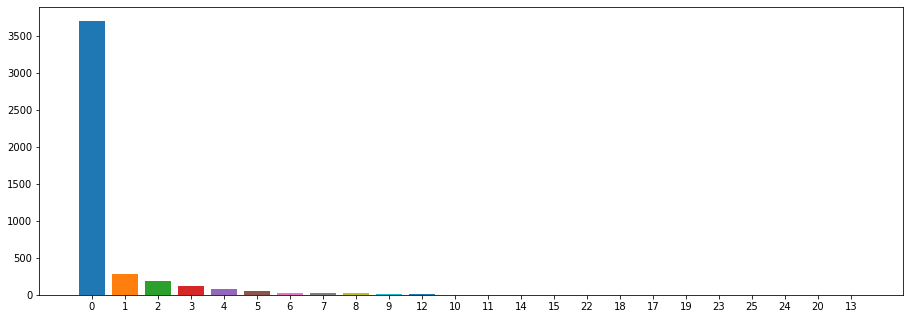

In [21]:
bank_data = sqlCtx.read.option('header','true').options(delimiter=";").csv('bank.csv')
bank_data = bank_data.groupBy(func.col('previous')).count().orderBy("count", ascending=False)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
count = 0
for _ in bank_data.collect():
    ax.bar(_[0], _[1])
    count += 1

## Task 3

### Create a **normalised** bar graph of the variable/attribute: previous;
Add normalised columns to the input dataframe.
formula = [(X - mean) / std_dev]

+--------+-----+
|previous|count|
+--------+-----+
|       0| 3705|
|       1|  286|
|       2|  193|
|       3|  113|
|       4|   78|
+--------+-----+
only showing top 5 rows

[Row(avg(count)=188.375, stddev_samp(count)=752.3032929379063)]


<Figure size 432x288 with 0 Axes>

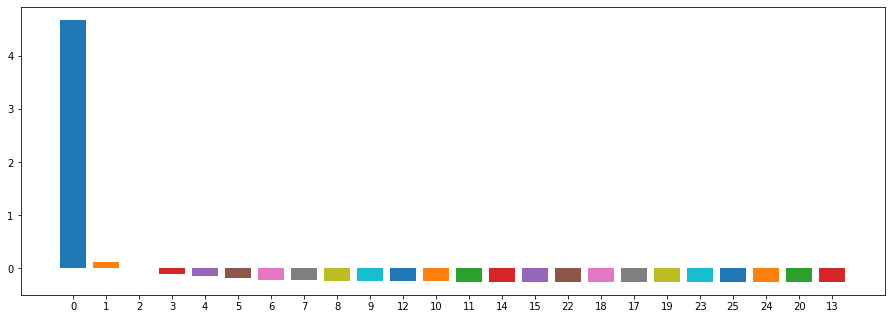

In [15]:
bank_data = bank_data.groupBy(func.col('previous')).count().orderBy("count", ascending=False)
bank_data.show(5)

mean_stddev = bank_data.groupBy().agg(func.mean('count'), func.stddev('count'))
mean_stddev_collect = mean_stddev.collect()
print(list(mean_stddev_collect))

bank_data = bank_data.withColumn('count', ((bank_data['count'] - mean_stddev_collect[0][0])/mean_stddev_collect[0][1]))

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

for _ in bank_data.collect():
    ax.bar(_[0], _[1])


## Task 4

### Create a histogram of the variable/attribute: age;

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

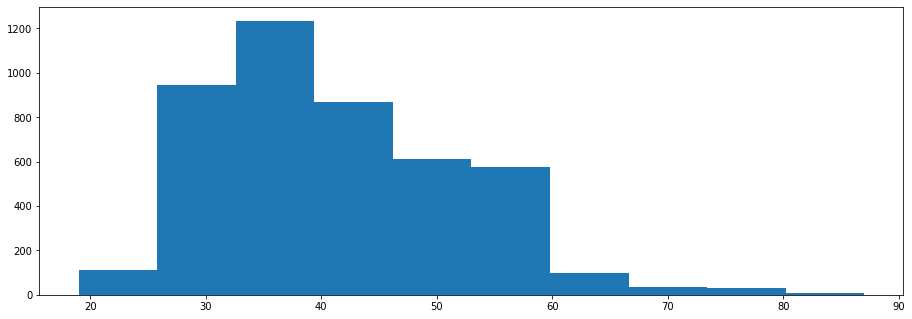

In [69]:
import numpy as np
import statistics

bank_data = sqlCtx.read.option('header','true').options(delimiter=";").csv('bank.csv')
data = bank_data.select(bank_data.age.cast(IntegerType())).collect()
counts, bins = np.histogram(data) # Auto range data

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.hist(bins[:-1], bins, weights=counts)

## Task 5

### Create a histogram of the **normalised** variable/attribute: age;

(array([-0.75040809,  1.08270023,  1.72307781,  0.91765446,  0.35209764,
         0.27287567, -0.7746148 , -0.91545385, -0.92865752, -0.97707094]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

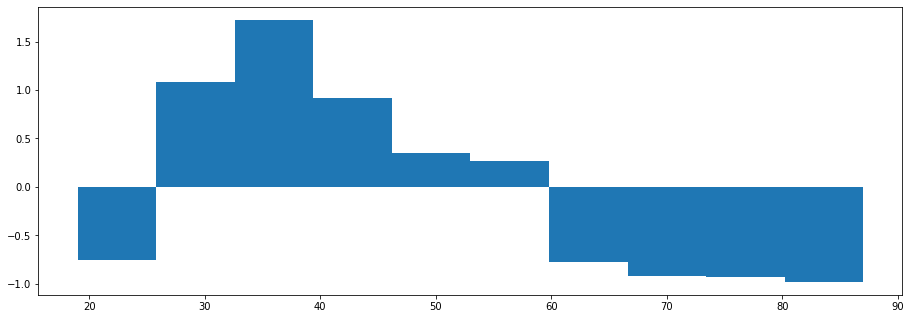

In [70]:
bank_data = sqlCtx.read.option('header','true').options(delimiter=";").csv('bank.csv')
data = bank_data.select(bank_data.age.cast(IntegerType())).collect()
counts, bins = np.histogram(data) # Auto range data
stddev = statistics.stdev(counts)
mean = statistics.mean(counts)
counts_norm = [(i - mean)/stddev for i in counts]

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.hist(bins[:-1], bins, weights=counts_norm)

## Task 6

### Bin the variable/attribute age and create a bar chart;

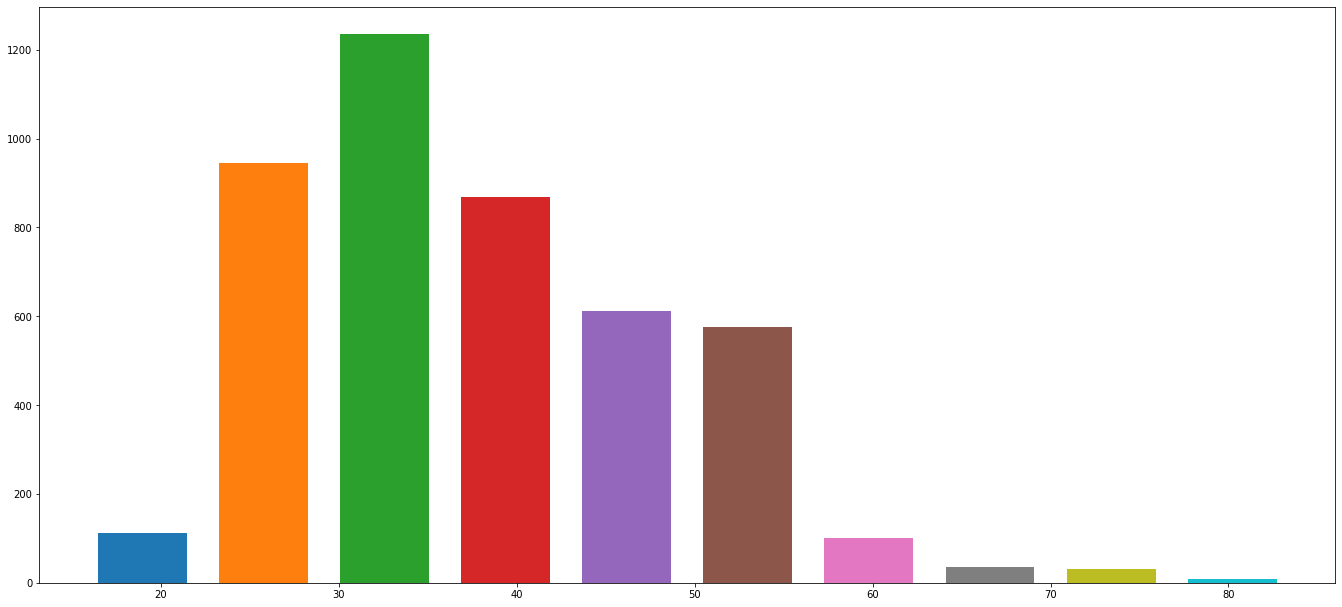

In [56]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
for _ in range(len(counts)):
    ax.bar(bins[_], counts[_], width=5)
    count += 1

## Task 7

### Create a scatter plot for the following variables/attributes: age and balance;

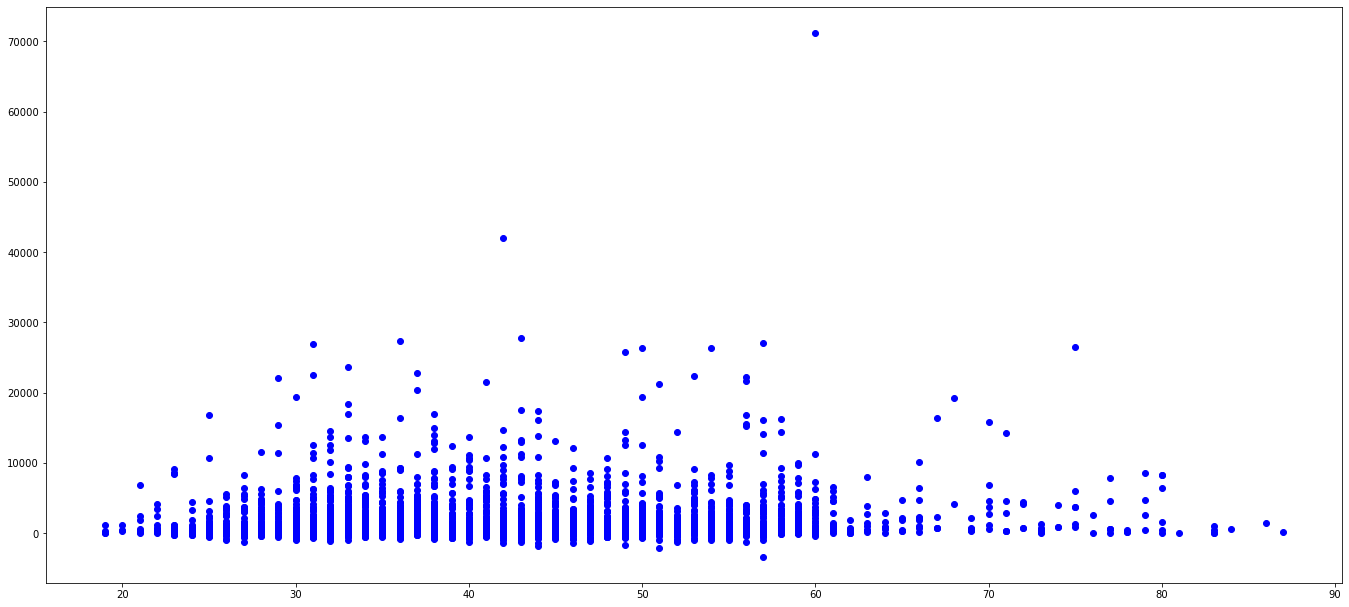

In [14]:
data = bank_data.select(bank_data.age.cast(IntegerType()), func.col("balance").cast(IntegerType())).collect()

fig = plt.figure()
ax = fig.add_axes([0,0,3,2])

age = [_[0] for _ in data]
balance = [_[1] for _ in data]
plt.scatter(age, balance, c ="blue")
 
# To show the plot
plt.show()